# Data Cleaning and Analysis with Sample imdb Data

## In this exercise, the task was to analyze a subset of the imdb movies database consisting of the top 10k movies. 

In [1]:
# Import of pandas and numpy libraries
import pandas as pd
import numpy as np

# Creating col_names variable to store column names
col_names = ['imdbID', 'title', 'year', 'score', 'votes', 'runtime', 'genres']
# Creating dataframe using imdb top 10000 txt file and assigning col_names for column names. Tab separation used to organize data.
imdb_top_movies = pd.read_csv('imdb_top_10000.txt', names = col_names, header = None, sep = '\t')

# Concat used to display head(7) and tail(7) rows
pd.concat([imdb_top_movies.head(7),imdb_top_movies.tail(7)])

,imdbID,title,year,score,votes,runtime,genres
0,tt0111161,The Shawshank Redemption (1994),1994,9.2,619479,142 mins.,Crime|Drama
1,tt0110912,Pulp Fiction (1994),1994,9.0,490065,154 mins.,Crime|Thriller
2,tt0137523,Fight Club (1999),1999,8.8,458173,139 mins.,Drama|Mystery|Thriller
3,tt0133093,The Matrix (1999),1999,8.7,448114,136 mins.,Action|Adventure|Sci-Fi
4,tt1375666,Inception (2010),2010,8.9,385149,148 mins.,Action|Adventure|Sci-Fi|Thriller
5,tt0109830,Forrest Gump (1994),1994,8.7,368994,142 mins.,Comedy|Drama|Romance
6,tt0169547,American Beauty (1999),1999,8.6,338332,122 mins.,Drama
9993,tt0218581,Scarlet Diva (2000),2000,5.2,1358,91 mins.,Drama
9994,tt0118635,Aprile (1998),1998,6.7,1358,78 mins.,Comedy
9995,tt0807721,Meduzot (2007),2007,7.0,1357,78 mins.,Drama


Removing Nans in the data and displaying how many appear in each column

In [2]:
# Creation of nulls and nanss varibale to store null check and the count for number of nulls in the data
nanss = imdb_top_movies.isnull().sum()

print('There are indeed nans in our data. There is 1 to be exact in our dataset')
print(nanss)

# Using dropna to remove nulls, and using inplace to make changes permanent
imdb_top_movies.dropna(thresh=7, inplace=True)

imdb_top_movies

There are indeed nans in our data. There is 1 to be exact in our dataset
imdbID     0
title      0
year       0
score      0
votes      0
runtime    0
genres     1
dtype: int64


,imdbID,title,year,score,votes,runtime,genres
0,tt0111161,The Shawshank Redemption (1994),1994,9.2,619479,142 mins.,Crime|Drama
1,tt0110912,Pulp Fiction (1994),1994,9.0,490065,154 mins.,Crime|Thriller
2,tt0137523,Fight Club (1999),1999,8.8,458173,139 mins.,Drama|Mystery|Thriller
3,tt0133093,The Matrix (1999),1999,8.7,448114,136 mins.,Action|Adventure|Sci-Fi
4,tt1375666,Inception (2010),2010,8.9,385149,148 mins.,Action|Adventure|Sci-Fi|Thriller
...,...,...,...,...,...,...,...
9995,tt0807721,Meduzot (2007),2007,7.0,1357,78 mins.,Drama
9996,tt0339642,Daltry Calhoun (2005),2005,5.2,1357,100 mins.,Comedy|Drama|Music|Romance
9997,tt0060880,The Quiller Memorandum (1966),1966,6.5,1356,104 mins.,Drama|Mystery|Thriller
9998,tt0152836,Taal (1999),1999,6.5,1356,179 mins.,Musical|Romance


Cleaning runtime column so calculations can be run

In [3]:
# Creating the two columns that will store the split values contained in the our 'runtime' column. Expand set to true to create the new columns after spliting data
imdb_top_movies[['Duration','units']] = imdb_top_movies.runtime.str.split(" ",expand=True)

# Setting Duration column to a float for later calculation
imdb_top_movies['Duration'] = imdb_top_movies.Duration.astype(float)

# Using drop function to remove units column containing "min" from runtime column split
imdb_top_movies.drop('units', inplace=True, axis=1)


imdb_top_movies

,imdbID,title,year,score,votes,runtime,genres,Duration
0,tt0111161,The Shawshank Redemption (1994),1994,9.2,619479,142 mins.,Crime|Drama,142.0
1,tt0110912,Pulp Fiction (1994),1994,9.0,490065,154 mins.,Crime|Thriller,154.0
2,tt0137523,Fight Club (1999),1999,8.8,458173,139 mins.,Drama|Mystery|Thriller,139.0
3,tt0133093,The Matrix (1999),1999,8.7,448114,136 mins.,Action|Adventure|Sci-Fi,136.0
4,tt1375666,Inception (2010),2010,8.9,385149,148 mins.,Action|Adventure|Sci-Fi|Thriller,148.0
...,...,...,...,...,...,...,...,...
9995,tt0807721,Meduzot (2007),2007,7.0,1357,78 mins.,Drama,78.0
9996,tt0339642,Daltry Calhoun (2005),2005,5.2,1357,100 mins.,Comedy|Drama|Music|Romance,100.0
9997,tt0060880,The Quiller Memorandum (1966),1966,6.5,1356,104 mins.,Drama|Mystery|Thriller,104.0
9998,tt0152836,Taal (1999),1999,6.5,1356,179 mins.,Musical|Romance,179.0


Computing the min, max, average and variance of the durations and which movies have the longest durations

In [4]:
# Creation of 'shortest','longest','average', and 'variance' variables to store min, max, average, and variance values
shortest = imdb_top_movies.Duration.min()
longest = imdb_top_movies.Duration.max()
average = imdb_top_movies.Duration.mean()
variance = imdb_top_movies.Duration.var()

print('Our shortest film in the dataset was',shortest,'minutes long.','Our longest film in the dataset was',longest,'minutes long.','The average film duration for movies in our dataset was',average,'.','While the variance of film durations in our dataset was',variance)

Our shortest film in the dataset was 0.0 minutes long. Our longest film in the dataset was 450.0 minutes long. The average film duration for movies in our dataset was 103.58035803580358 . While the variance of film durations in our dataset was 709.1201422602626


Displaying the year range of films included in the dataset

In [5]:
# Creation of 'years' variable to store the unique values contained in year column
years = imdb_top_movies.year.unique()
# Sorting of 'years' variable to or order numerically 
years.sort()

years


array([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011])

In [6]:
# Alternative solution to produce range of values in the year column
def min_max(data_frame_column):
    print(data_frame_column.min())
    print(data_frame_column.max())

min_max(imdb_top_movies.year)

1950
2011


Counting Duplicate titles

In [7]:
# Creating dups variable to store count of duplicated titles/data

dups = imdb_top_movies[['title']].duplicated().sum()

print('Yes there are duplicates in the data. Using titles as our reference field, we found',dups,'duplicates in the dataset')

Yes there are duplicates in the data. Using titles as our reference field, we found 2 duplicates in the dataset


Calculating the number of movies produced each year then plot number of movies vs years, what is the year that has the highest movies.


2006 is the year with the most movie releases. In  2006  there were 502 movies released!


<Axes: xlabel='year'>

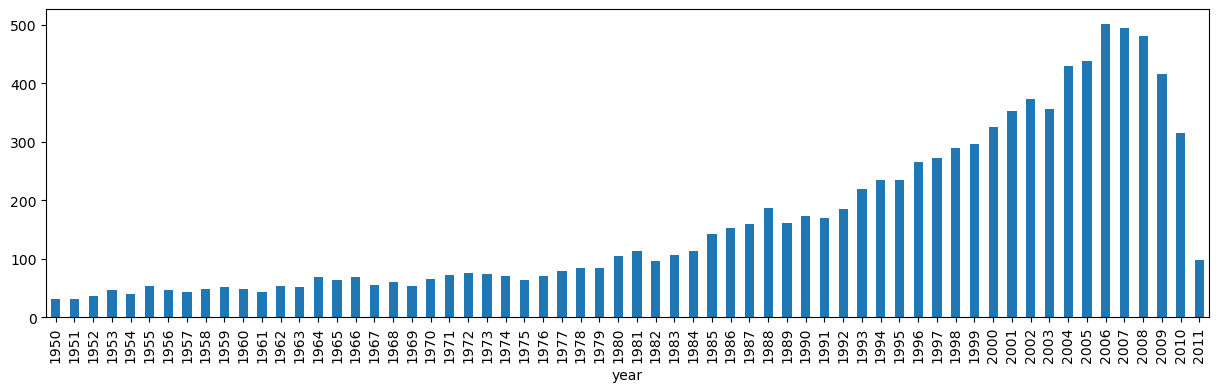

In [8]:
# Creation of most_movies and year_w_most varibles to store the values for the highest number of films released in a single year, and the actual year with the highest number of releases
most_movies = imdb_top_movies.groupby("year")["title"].count().max()
year_w_most = imdb_top_movies.groupby("year")["title"].count().idxmax()

# Printing results
print(year_w_most,'is the year with the most movie releases. In ',year_w_most,' there were', most_movies, 'movies released!') 

# Using pandas plot function to plot my grouped data. Bar chart was chosen to display the years on x-axis and number of releases on y-axis
imdb_top_movies.groupby("year")["title"].count().plot(kind='bar', fontsize = 10, figsize=(15,4))

